In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

deliveries = pd.read_csv("./resources/deliveries.csv")
matches = pd.read_csv("./resources/matches.csv")
umpires = pd.read_csv("./resources/umpires.csv")

In [2]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [3]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
umpires.head()

,umpire,country
0,Subroto Das,India
1,HDPK Dharmasena,Sri Lanka
2,KN Ananthapadmanabhan,India
3,M Erasmus,South Africa
4,S Das,India


## Total runs scored by team

<BarContainer object of 14 artists>

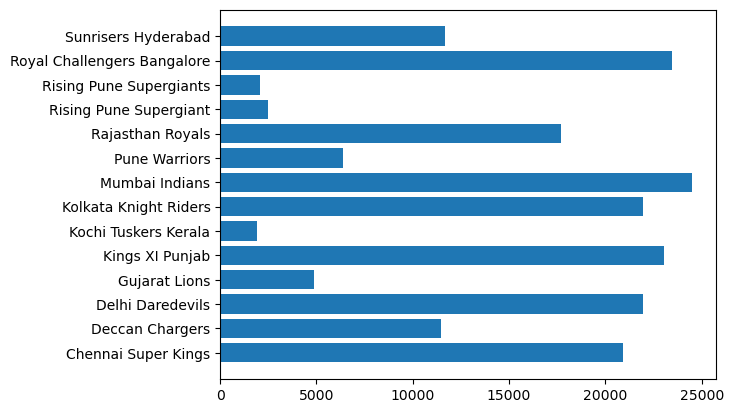

In [5]:
total_runs=deliveries.groupby('batting_team')['total_runs'].sum().reset_index()
plt.barh(total_runs['batting_team'], total_runs['total_runs'])

## Top batsman for Royal Challengers Bangalore

<BarContainer object of 10 artists>

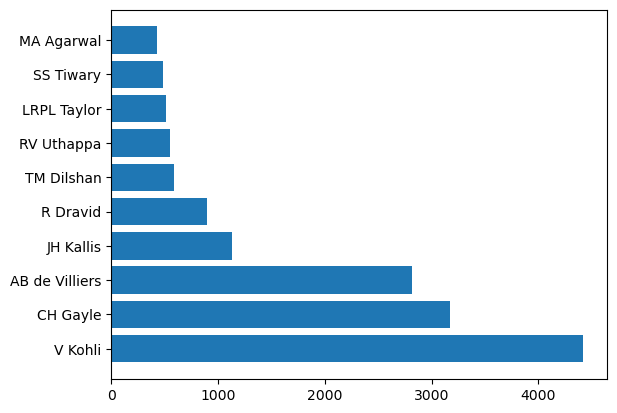

In [6]:
batting_team=deliveries[deliveries['batting_team']=='Royal Challengers Bangalore']
batsman_run=batting_team.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).reset_index().head(10)
plt.barh(batsman_run['batsman'], batsman_run['batsman_runs'])

## Foreign umpire analysis

<BarContainer object of 8 artists>

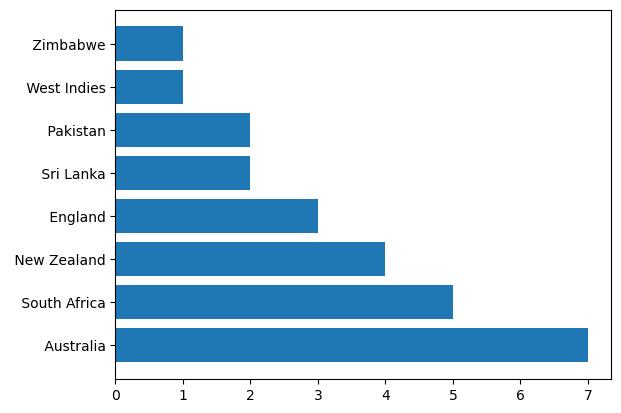

In [7]:
umpires_not_indian=umpires[umpires[' country']!=' India']
grouped_data=umpires_not_indian[' country'].value_counts().reset_index()
plt.barh(grouped_data[' country'], grouped_data['count'])

## Stacked chart of matches played by team by season

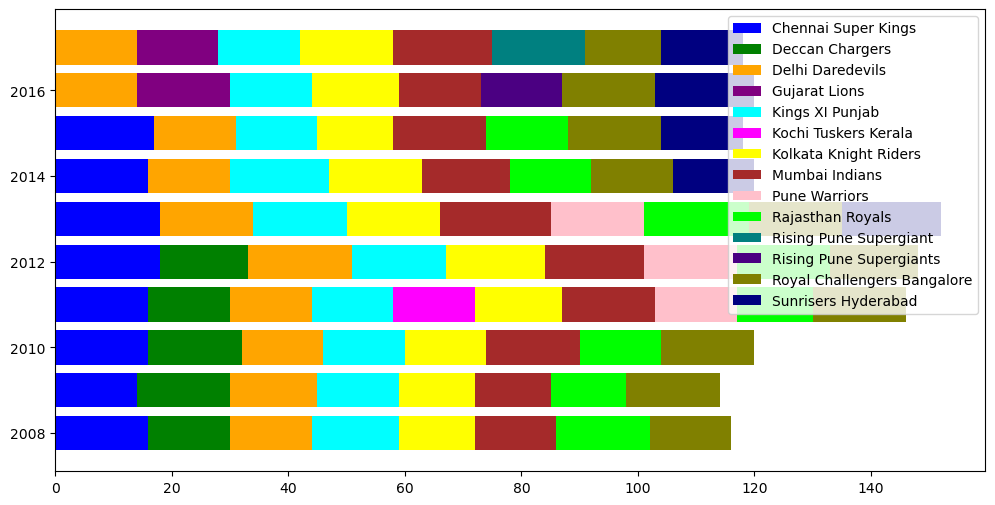

In [8]:
team_per_season=matches.groupby('season')['team1'].value_counts().reset_index()
team_per_season2=matches.groupby('season')['team2'].value_counts().reset_index()
team_per_season2.rename(columns={'team2':'team1'}, inplace=True)
grouped_data=pd.concat([team_per_season,team_per_season2]).groupby(['season', 'team1'])['count'].sum().reset_index()
pivoted_data=grouped_data.pivot_table(index='season', columns='team1', values='count', fill_value=0).reset_index()

colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'brown', 'pink',
          'lime', 'teal', 'indigo', 'olive', 'navy', 'aquamarine', 'coral', 'gold', 'gray', 'maroon']

plt.figure(figsize=(12,6))

for i in range(1, len(pivoted_data.values[0])):
  plt.barh(pivoted_data.iloc[:, 0], pivoted_data.iloc[:, i], left = np.sum(pivoted_data.iloc[:, 1:i], axis = 1), label=pivoted_data.columns[i], color=colors[i])

plt.legend()

## Number of matches played per year for all the years in IPL

<BarContainer object of 10 artists>

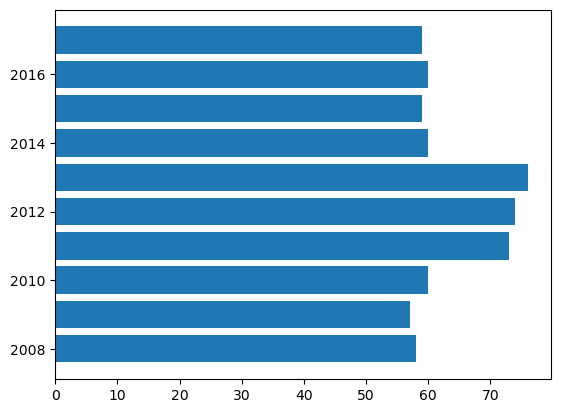

In [9]:
no_of_matches_per_season=matches['season'].value_counts().reset_index()
plt.barh(no_of_matches_per_season['season'], no_of_matches_per_season['count'])

## Number of matches won per team per year in IPL

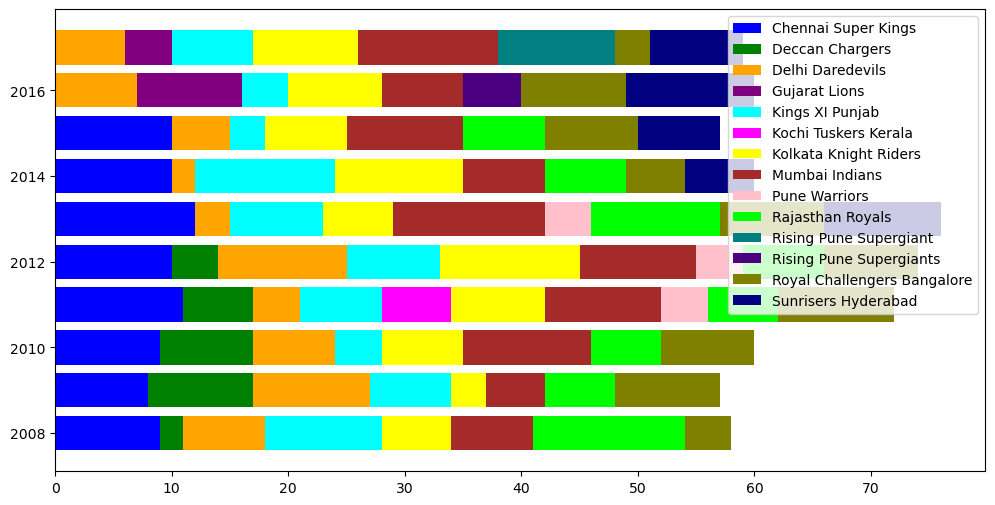

In [10]:
season_winners=matches.groupby('season')['winner'].value_counts().reset_index()
pivoted_data=season_winners.pivot_table(index='season', columns='winner', values='count', fill_value=0).reset_index()

colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'brown', 'pink',
          'lime', 'teal', 'indigo', 'olive', 'navy', 'aquamarine', 'coral', 'gold', 'gray', 'maroon']

plt.figure(figsize=(12,6))

for i in range(1, len(pivoted_data.values[0])):
  plt.barh(pivoted_data.iloc[:, 0], pivoted_data.iloc[:, i], left = np.sum(pivoted_data.iloc[:, 1:i], axis = 1), label=pivoted_data.columns[i], color=colors[i])

plt.legend()

## Extra runs conceded per team in the year 2016

<BarContainer object of 8 artists>

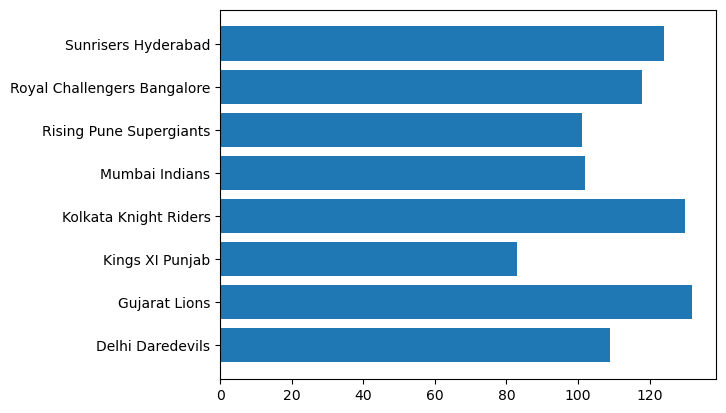

In [11]:
extra_runs_per_team=deliveries.groupby(['match_id','batting_team'])['extra_runs'].sum().reset_index()

season_value=[]
for i in range(0, len(extra_runs_per_team.values)):
    season_value.append(matches['season'][extra_runs_per_team['match_id'][i]-1])

extra_runs_per_team['season']=season_value
grouped_data=extra_runs_per_team.groupby(['season', 'batting_team'])['extra_runs'].sum().reset_index()
filtered_data=grouped_data[grouped_data['season']==2016]

plt.barh(filtered_data['batting_team'], filtered_data['extra_runs'])

## Top 10 economical bowlers in the year 2015

<BarContainer object of 10 artists>

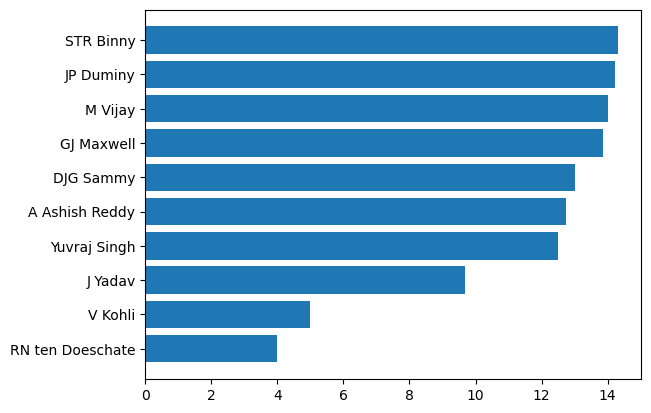

In [12]:
bowler_data=deliveries.groupby(['match_id','bowler'])['total_runs'].sum().reset_index()

season_value=[]
for i in range(0, len(bowler_data.values)):
    season_value.append(matches['season'][bowler_data['match_id'][i]-1])

bowler_data['season']=season_value
bowler_economy=bowler_data.groupby(['season', 'bowler'])['total_runs'].mean().sort_values().reset_index()
filtered_data=bowler_economy[bowler_economy['season']==2015]

plt.barh(filtered_data['bowler'].head(10), filtered_data['total_runs'].head(10))